# Model

- XGBoost (use Chatgpt for the framework of classification)

# Features

- Pct Change of Meat Production (1m, 3m, 6m)
- stock autocorrelation
- cold storage
- determinlistic process (add later to see if any improvement)

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

In [21]:
stocks = pd.read_csv("Data/all_stock_and_etfs.csv", index_col=0)
MCD = stocks[stocks.Ticker_Symbol == "MCD"]

In [22]:
display(MCD)

,Open,High,Low,Close,Volume,Ticker_Symbol
Date-Time,,,,,,
2024-02-20,292.00,295.4999,291.84,292.65,2263994,MCD
2024-02-16,290.79,293.7000,289.26,292.02,2837573,MCD
2024-02-15,287.90,292.1000,287.28,291.86,2401617,MCD
2024-02-14,287.32,288.3200,286.59,288.17,2139326,MCD
2024-02-13,288.63,289.9000,285.67,287.11,2756190,MCD
...,...,...,...,...,...,...
1999-11-05,45.69,46.6300,45.63,46.50,7184900,MCD
1999-11-04,43.69,45.2500,43.44,45.19,9834800,MCD
1999-11-03,41.25,43.4400,41.06,41.94,7600400,MCD


In [23]:
MCD = MCD[::-1]

In [24]:
MCD['Shifted'] = MCD['Close'].shift(-20)
MCD['Signal'] = (MCD['Close'] < MCD['Shifted']).astype(int)
MCD = MCD.drop('Shifted', axis=1)
display(MCD)

,Open,High,Low,Close,Volume,Ticker_Symbol,Signal
Date-Time,,,,,,,
1999-11-01,41.75,42.0000,41.25,41.69,3932900,MCD,1
1999-11-02,42.06,42.1300,41.06,41.25,2250000,MCD,1
1999-11-03,41.25,43.4400,41.06,41.94,7600400,MCD,1
1999-11-04,43.69,45.2500,43.44,45.19,9834800,MCD,1
1999-11-05,45.69,46.6300,45.63,46.50,7184900,MCD,0
...,...,...,...,...,...,...,...
2024-02-13,288.63,289.9000,285.67,287.11,2756190,MCD,0
2024-02-14,287.32,288.3200,286.59,288.17,2139326,MCD,0
2024-02-15,287.90,292.1000,287.28,291.86,2401617,MCD,0


In [25]:
MCD['1m_pct_change'] = MCD['Close'].pct_change(periods=20)
MCD['3m_pct_change'] = MCD['Close'].pct_change(periods=60)
MCD['6m_pct_change'] = MCD['Close'].pct_change(periods=120)

In [26]:
MCD['Return'] = MCD['Close'].pct_change()
MCD['1m_volatility'] = MCD['Return'].rolling(window=20).std() * np.sqrt(20)
MCD['3m_volatility'] = MCD['Return'].rolling(window=60).std() * np.sqrt(60)
MCD['6m_volatility'] = MCD['Return'].rolling(window=120).std() * np.sqrt(120)

In [27]:
display(MCD)

,Open,High,Low,Close,Volume,Ticker_Symbol,Signal,1m_pct_change,3m_pct_change,6m_pct_change,Return,1m_volatility,3m_volatility,6m_volatility
Date-Time,,,,,,,,,,,,,,
1999-11-01,41.75,42.0000,41.25,41.69,3932900,MCD,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-11-02,42.06,42.1300,41.06,41.25,2250000,MCD,1,NaN,NaN,NaN,-0.010554,NaN,NaN,NaN
1999-11-03,41.25,43.4400,41.06,41.94,7600400,MCD,1,NaN,NaN,NaN,0.016727,NaN,NaN,NaN
1999-11-04,43.69,45.2500,43.44,45.19,9834800,MCD,1,NaN,NaN,NaN,0.077492,NaN,NaN,NaN
1999-11-05,45.69,46.6300,45.63,46.50,7184900,MCD,0,NaN,NaN,NaN,0.028989,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-13,288.63,289.9000,285.67,287.11,2756190,MCD,0,-0.013673,0.061837,0.024259,-0.008050,0.059605,0.078592,0.108827
2024-02-14,287.32,288.3200,286.59,288.17,2139326,MCD,0,-0.010269,0.043640,0.022351,0.003692,0.059757,0.075935,0.108751
2024-02-15,287.90,292.1000,287.28,291.86,2401617,MCD,0,-0.008493,0.058422,0.033682,0.012805,0.060148,0.076849,0.109467


In [28]:
data = MCD
data = data.drop(['Open', 'High', 'Low', 'Volume', 'Ticker_Symbol', 'Close'], axis=1)

In [29]:
display(data)

,Signal,1m_pct_change,3m_pct_change,6m_pct_change,Return,1m_volatility,3m_volatility,6m_volatility
Date-Time,,,,,,,,
1999-11-01,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-11-02,1,NaN,NaN,NaN,-0.010554,NaN,NaN,NaN
1999-11-03,1,NaN,NaN,NaN,0.016727,NaN,NaN,NaN
1999-11-04,1,NaN,NaN,NaN,0.077492,NaN,NaN,NaN
1999-11-05,0,NaN,NaN,NaN,0.028989,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2024-02-13,0,-0.013673,0.061837,0.024259,-0.008050,0.059605,0.078592,0.108827
2024-02-14,0,-0.010269,0.043640,0.022351,0.003692,0.059757,0.075935,0.108751
2024-02-15,0,-0.008493,0.058422,0.033682,0.012805,0.060148,0.076849,0.109467


In [30]:
data = data.dropna()

In [31]:
display(data)

,Signal,1m_pct_change,3m_pct_change,6m_pct_change,Return,1m_volatility,3m_volatility,6m_volatility
Date-Time,,,,,,,,
2000-04-24,0,0.120368,0.036407,-0.064524,0.089081,0.171331,0.242856,0.314538
2000-04-25,1,0.115108,0.054422,-0.060606,-0.006410,0.171628,0.241708,0.314427
2000-04-26,0,0.106746,0.040128,-0.072961,0.003355,0.171573,0.241185,0.313989
2000-04-27,0,0.054333,0.059514,-0.141182,-0.001800,0.165851,0.240242,0.304053
2000-04-28,0,0.011427,0.072113,-0.181505,-0.019325,0.166055,0.238941,0.303103
...,...,...,...,...,...,...,...,...
2024-02-13,0,-0.013673,0.061837,0.024259,-0.008050,0.059605,0.078592,0.108827
2024-02-14,0,-0.010269,0.043640,0.022351,0.003692,0.059757,0.075935,0.108751
2024-02-15,0,-0.008493,0.058422,0.033682,0.012805,0.060148,0.076849,0.109467


In [32]:
data.index = pd.to_datetime(data.index)
train_data = data[data.index < "2019-01-01"]
test_data = data[data.index >= "2019-01-01"]

In [33]:
X_train = train_data.iloc[:,1:]
y_train = train_data.iloc[:,0:1]

X_test = test_data.iloc[:,1:]
y_test = test_data.iloc[:,0:1]

model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [34]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 55.34%


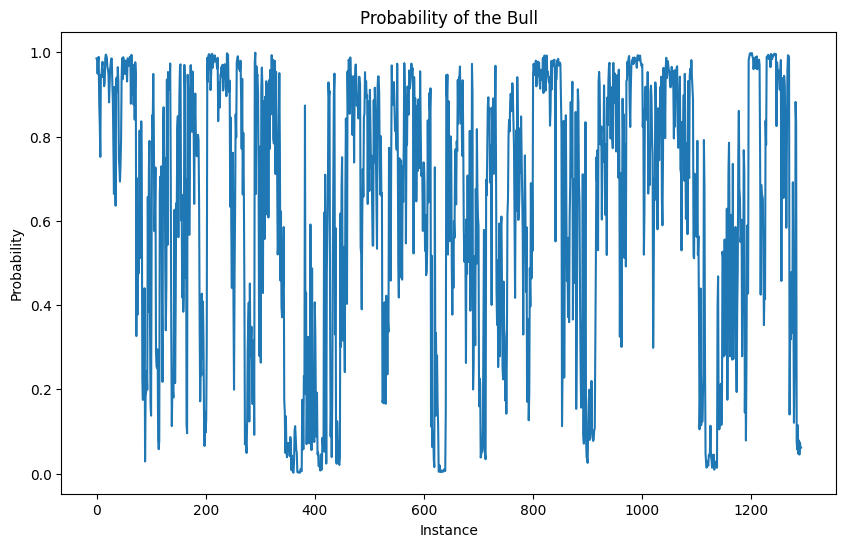

In [35]:
y_probabilities = model.predict_proba(X_test)
event_probability = y_probabilities[:, 1]
plt.figure(figsize=(10, 6))
plt.plot(event_probability)
plt.xlabel('Instance')
plt.ylabel('Probability')
plt.title('Probability of the Bull')
plt.show()

In [36]:
data.to_csv("Intermediate_data/branchmark_dataset.csv")